# Data Exploration

## Dependencies Import

In [1]:
import pandas as pd

import nltk # Natural Language Tool Kit
nltk.download('punkt') # Needed for nltk.word_tokenize
nltk.download('stopwords') # Needed for nltk.corpus.stopwords
from nltk.stem import PorterStemmer # Needed for stemming

from tqdm import tqdm # Needed to the progress indicators
tqdm.pandas(desc='Progress: ')

import string # Needed for string.punctuation

from autocorrect import Speller # Needed for spell correction of words

from collections import Counter # Needed for word frequency counting

# Needed for plotting
import numpy as np
import matplotlib.pyplot as plt # Worked on matplotlib-3.5.3

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Basiu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Basiu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Loading Data

In [2]:
train_df = pd.read_csv("../input/feedback-prize-effectiveness/train.csv")

# We reorder the colums to move 'discourse_text' last column to the end
train_df = train_df[["discourse_id", "essay_id", "discourse_type", "discourse_effectiveness", "discourse_text"]]

In [3]:
train_df.head()

,discourse_id,essay_id,discourse_type,discourse_effectiveness,discourse_text
0,0013cc385424,007ACE74B050,Lead,Adequate,"Hi, i'm Isaac, i'm going to be writing about h..."
1,9704a709b505,007ACE74B050,Position,Adequate,"On my perspective, I think that the face is a ..."
2,c22adee811b6,007ACE74B050,Claim,Adequate,I think that the face is a natural landform be...
3,a10d361e54e4,007ACE74B050,Evidence,Adequate,"If life was on Mars, we would know by now. The..."
4,db3e453ec4e2,007ACE74B050,Counterclaim,Adequate,People thought that the face was formed by ali...


## Data Validation

In [4]:
# Check for any missing values
assert train_df.isna().any().any() == False

# Check for any empty strings
assert train_df.eq("").any().any() == False

## Data Preprocessing

In [5]:
# We start with lowercasing and tokenizing 'disourse_text'
train_df['discourse_tokenized'] = train_df['discourse_text'].progress_apply(lambda d: nltk.word_tokenize(d.lower()))

Progress: 100%|████████████████████████████████████████████████████████████████| 36765/36765 [00:08<00:00, 4585.48it/s]


In [6]:
# Next we prepare the punctuation to be removed from the discource
punctuation = set(string.punctuation)

print("Punctuation to be removed from the discourse text:\n", punctuation)

Punctuation to be removed from the discourse text:
 {'#', '>', '\\', '`', '$', '~', '@', ';', ':', '-', '^', '.', '*', '[', '=', '&', "'", '{', '!', '<', '|', '_', '"', '?', '+', ')', '/', ']', '%', ',', '(', '}'}


In [7]:
# Now we will remove the punctuation from the sanitized discourse
train_df['discourse_no_punct'] = train_df['discourse_tokenized'].progress_apply(lambda d: list(filter(lambda w: w not in punctuation, d)))

Progress: 100%|██████████████████████████████████████████████████████████████| 36765/36765 [00:00<00:00, 112388.53it/s]


In [8]:
# We will also attempt to spellcheck the words in our discourse
spell = Speller(lang='en')
train_df['discourse_spellchecked'] = train_df['discourse_no_punct'].progress_apply(lambda d: list(map(lambda w: spell(w), d)))

Progress: 100%|██████████████████████████████████████████████████████████████████| 36765/36765 [11:38<00:00, 52.64it/s]


In [9]:
# Then we prepare the list of the stop words (meaningless words) to remove from the discourse
stopwords_english = set() # set(nltk.corpus.stopwords.words('english'))
stopwords_english = stopwords_english.union({'scientist', 'do', 'as', 'emotional', '``', 'at', 'and', 'than', 'this', 'get', 'into', 'face', 'us', 'day', 'having', 'others', 'your', "''", 'were', 'any', 'be', 'go', 'could', 'state', 'cause', 'know', 'out', 'every', 'that', 'there', 'have', 'voter', 'just', 'most', 'many', 'give', 'has', 'with', 'then', 'time', 'reason', 'also', 'why', 'an', 'want', 'mars', 'or', 'sport', 'a', 'elect', 'alien', 'people', 'after', 'system', 'is', 'summer', 'it', 'driverless', 'planet', 'when', 'all', 'not', 'by', 'they', 'how', 'on', 'our', 'what', 'doing', 'to', 'person', 'where', 'find', 'thing', 'getting', 'for', 'did', 'more', 'can', 'only', 'emotions', 'see', 'no', 'like', "'s", 'use', 'who', 'make', 'technological', 'lot', 'from', 'of', 'around', 'class', 'attend', 'better', 'same', 'importing', 'ability', "n't", 'vote', 'drive', 'now', 'home', 'someone', 'other', 'my', 'point', "'m", '...', 'up', 'complete', 'different', 'was', 'the', 'over', 'taking', 'grade', 'able', 'so', 'work', 'need', 'are', 'way', 'them', 'even', 'making', 'school', 'show', 'import', 'something', 'difference', 'am', 'because', 'scientists', 'one', 'technology', 'in', 'emotion', 'car', 'create', 'distance', 'take', 'driving', 'picture', 'picturing', 'needing', 'important', 'each'}) # Some of our own additions

# We will remove retain words which we think might influence the discource effectiveness
#stopwords_english = stopwords_english.difference(set({'than', 'wouldn', 'having', 'aren', 'into', 'more', 'didn', 'what', 'down', "aren't", 'needn', 'were', "mustn't", 'being', 'not', 'but', 'during', 'there', 'such', 'if', 'will', 'hasn', 'after', 'any', 'only', "needn't", "haven't", 'mustn', 'below', 'shan', 'while', 'under', 'same', 'wasn', 'most', "won't", "wouldn't", 'over', 'all', 'isn', 'until', 'doing', 'haven', 'once', 'should', "couldn't", 'hadn', 'weren', 'here', 'how', 'too', 'both', 'doesn', 'above', 'other', 'why', 'nor', 'against', 'about', 'then', 'no', 'between', 'before', "weren't", 'through', "shouldn't", "mightn't", 'further', 'or', 'by', 'from', 'whom', "wasn't", "shan't", "doesn't", 'shouldn', "should've", 'each', 'have', 'had', 'very', 'does', 'couldn', 'with', 'do', 'now', "isn't", "don't", "you've", 'ain', 'can', 'out', 'mightn', "hasn't", 'at', 'who', "didn't", 'few', 'was', 'where', 'some', 'because', 'which', 'don', 'when'}))

print("Stop(meaningless) words to be removed from the discourse text:\n", stopwords_english)

Stop(meaningless) words to be removed from the discourse text:
 {'the', 'lot', 'show', 'do', 'getting', 'scientist', 'then', 'emotions', "n't", 'they', 'to', 'alien', 'that', 'all', 'why', 'has', 'needing', 'give', 'most', 'emotional', 'vote', 'same', 'importing', 'having', 'sport', 'of', 'ability', 'at', 'us', 'could', 'after', 'home', 'am', 'there', 'difference', 'want', "'m", 'driverless', 'get', 'voter', 'know', 'go', 'point', 'up', 'something', 'so', 'an', 'every', 'many', 'people', 'did', 'than', 'is', 'school', 'picture', 'any', 'for', 'thing', 'like', 'way', 'important', '...', 'out', 'distance', 'use', 'grade', 'even', 'into', 'picturing', 'are', 'summer', 'what', 'can', 'reason', 'only', 'other', 'be', 'class', 'a', 'face', 'planet', 'driving', 'my', 'day', 'your', 'have', 'doing', 'someone', 'with', 'better', "''", 'who', 'state', 'mars', '``', 'in', 'import', 'not', 'around', 'each', "'s", 'able', 'elect', 'by', 'taking', 'emotion', 'find', 'one', 'and', 'just', 'make', 'on

In [10]:
# Now we will remove the stop-words from the sanitized discourse
train_df['discourse_no_stopwords'] = train_df['discourse_spellchecked'].progress_apply(lambda d: list(filter(lambda w: w not in stopwords_english, d)))

Progress: 100%|██████████████████████████████████████████████████████████████| 36765/36765 [00:00<00:00, 116287.91it/s]


In [11]:
# Next we will perform the stemming of words in the sanitized discourse
stemmer = PorterStemmer()
train_df['discourse_stemmed'] = train_df['discourse_no_stopwords'].progress_apply(lambda d: list(map(lambda w: stemmer.stem(w), d)))

Progress: 100%|████████████████████████████████████████████████████████████████| 36765/36765 [00:09<00:00, 3841.35it/s]


In [12]:
# And we'll add a 'discourse_word_count' column to the data frame
train_df['discourse_word_count'] = train_df['discourse_stemmed'].progress_apply(lambda d: len(d))
train_df.head()

Progress: 100%|█████████████████████████████████████████████████████████████| 36765/36765 [00:00<00:00, 1117085.41it/s]


,discourse_id,essay_id,discourse_type,discourse_effectiveness,discourse_text,discourse_tokenized,discourse_no_punct,discourse_spellchecked,discourse_no_stopwords,discourse_stemmed,discourse_word_count
0,0013cc385424,007ACE74B050,Lead,Adequate,"Hi, i'm Isaac, i'm going to be writing about h...","[hi, ,, i, 'm, isaac, ,, i, 'm, going, to, be,...","[hi, i, 'm, isaac, i, 'm, going, to, be, writi...","[hi, i, 'm, isaac, i, 'm, going, to, be, writi...","[hi, i, isaac, i, going, writing, about, natur...","[hi, i, isaac, i, go, write, about, natur, lan...",26
1,9704a709b505,007ACE74B050,Position,Adequate,"On my perspective, I think that the face is a ...","[on, my, perspective, ,, i, think, that, the, ...","[on, my, perspective, i, think, that, the, fac...","[on, my, perspective, i, think, that, the, fac...","[perspective, i, think, natural, landform, i, ...","[perspect, i, think, natur, landform, i, dont,...",21
2,c22adee811b6,007ACE74B050,Claim,Adequate,I think that the face is a natural landform be...,"[i, think, that, the, face, is, a, natural, la...","[i, think, that, the, face, is, a, natural, la...","[i, think, that, the, face, is, a, natural, la...","[i, think, natural, landform, life, we, discov...","[i, think, natur, landform, life, we, discov, ...",8
3,a10d361e54e4,007ACE74B050,Evidence,Adequate,"If life was on Mars, we would know by now. The...","[if, life, was, on, mars, ,, we, would, know, ...","[if, life, was, on, mars, we, would, know, by,...","[if, life, was, on, mars, we, would, know, by,...","[if, life, we, would, i, think, natural, landf...","[if, life, we, would, i, think, natur, landfor...",32
4,db3e453ec4e2,007ACE74B050,Counterclaim,Adequate,People thought that the face was formed by ali...,"[people, thought, that, the, face, was, formed...","[people, thought, that, the, face, was, formed...","[people, thought, that, the, face, was, formed...","[thought, formed, aliens, thought, life]","[thought, form, alien, thought, life]",5


## Saving Preprocessed Data

In [13]:
# We will now output the dataframe into a file
train_df.to_csv("../input/feedback-prize-effectiveness/train_preproc_v4.csv")

## Basic Exploration

In [14]:
# Here we just count number of unique and total values in text columns
train_df[['discourse_id', 'essay_id', 'discourse_type', 'discourse_effectiveness', 'discourse_text']].describe()

,discourse_id,essay_id,discourse_type,discourse_effectiveness,discourse_text
count,36765,36765,36765,36765,36765
unique,36765,4191,7,3,36691
top,0013cc385424,91B1F82B2CF1,Evidence,Adequate,Summer projects should be student-designed
freq,1,23,12105,20977,14


In [15]:
# Distribution of preprocessed discourse word lengths 
train_df['discourse_word_count'].describe()

count    36765.000000
mean        21.294492
std         23.295911
min          0.000000
25%          7.000000
50%         13.000000
75%         27.000000
max        402.000000
Name: discourse_word_count, dtype: float64

In [16]:
# Distribution among the types of the discourse provided
discourse_type_distribution = train_df["discourse_type"].value_counts()
discourse_type_distribution

Evidence                12105
Claim                   11977
Position                 4024
Concluding Statement     3351
Lead                     2291
Counterclaim             1773
Rebuttal                 1244
Name: discourse_type, dtype: int64

<AxesSubplot:>

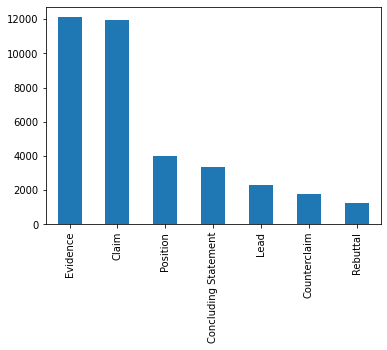

In [17]:
discourse_type_distribution.plot.bar()

In [18]:
# Distribution of discourse effectiveness
discourse_effectiveness_distribution = train_df["discourse_effectiveness"].value_counts()
discourse_effectiveness_distribution

Adequate       20977
Effective       9326
Ineffective     6462
Name: discourse_effectiveness, dtype: int64

<AxesSubplot:>

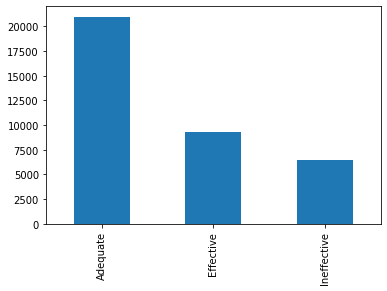

In [19]:
discourse_effectiveness_distribution.plot.bar()

In [20]:
# Let's break up the effectiveness of the discourse by the discourse type

# First we count the membership of each discourse type & effectiveness group
group = train_df[["discourse_id", "discourse_type", "discourse_effectiveness"]].groupby(["discourse_type", "discourse_effectiveness"]).count()
group.rename(columns={"discourse_id": "count"}, inplace=True) # Rename the last column into "count"
group.reset_index(inplace=True)

# Second, we will display the count of each effectiveness per discourse type in percents of all discourses of that type

discourse_type_distribution = discourse_type_distribution.to_dict() # Convert previous dataframe into a dict

 # Temporarely store the total discourses of a particular type as "% of discource type"
group["% discourse effectiveness by type"] = group["discourse_type"].map(lambda x: discourse_type_distribution[x])

# Actualy calculate the percentage
group["% discourse effectiveness by type"] = round((100 * group["count"]) / group["% discourse effectiveness by type"], 2)
group

,discourse_type,discourse_effectiveness,count,% discourse effectiveness by type
0,Claim,Adequate,7097,59.26
1,Claim,Effective,3405,28.43
2,Claim,Ineffective,1475,12.32
3,Concluding Statement,Adequate,1945,58.04
4,Concluding Statement,Effective,825,24.62
5,Concluding Statement,Ineffective,581,17.34
6,Counterclaim,Adequate,1150,64.86
7,Counterclaim,Effective,418,23.58
8,Counterclaim,Ineffective,205,11.56
9,Evidence,Adequate,6064,50.10


In [21]:
# Same as above in dictionary form, used for the baseline submission
effectiveness_map = {}
for index, row in group.iterrows():
    if row["discourse_type"] not in effectiveness_map:
        effectiveness_map[row["discourse_type"]] = {}
    effectiveness_map[row["discourse_type"]][row["discourse_effectiveness"]] = row["% discourse effectiveness by type"] / 100

print(effectiveness_map)

{'Claim': {'Adequate': 0.5926, 'Effective': 0.2843, 'Ineffective': 0.1232}, 'Concluding Statement': {'Adequate': 0.5804, 'Effective': 0.2462, 'Ineffective': 0.1734}, 'Counterclaim': {'Adequate': 0.6486, 'Effective': 0.23579999999999998, 'Ineffective': 0.11560000000000001}, 'Evidence': {'Adequate': 0.501, 'Effective': 0.23829999999999998, 'Ineffective': 0.2607}, 'Lead': {'Adequate': 0.5429999999999999, 'Effective': 0.2981, 'Ineffective': 0.1589}, 'Position': {'Adequate': 0.6918000000000001, 'Effective': 0.19140000000000001, 'Ineffective': 0.1168}, 'Rebuttal': {'Adequate': 0.5571, 'Effective': 0.2733, 'Ineffective': 0.1696}}


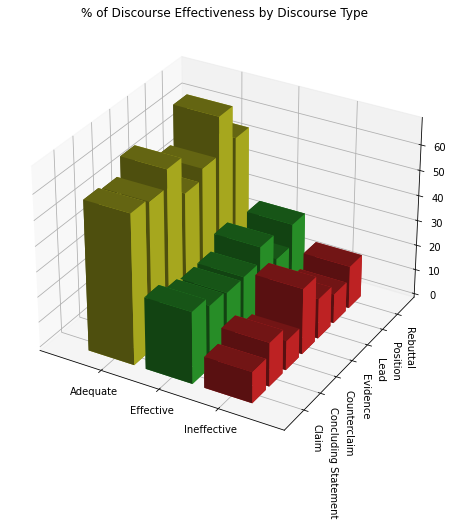

In [28]:
# Now we will plot the above
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111, projection='3d')

effectiveness = list(group["discourse_effectiveness"].unique())
x_ticks_map = {i : effectiveness[i] for i in range(len(effectiveness))}
ax1.set_xticks(range(len(effectiveness)), labels=[x_ticks_map[i] for i in range(len(effectiveness))])
ax1.set_xlim(left=-1.0, right=len(effectiveness))
x_ticks_reverse_map = {val: key for (key, val) in x_ticks_map.items()}

types = list(group["discourse_type"].unique())
y_ticks_map = {i : types[i] for i in range(len(types))}
ax1.set_yticks(range(len(types)), labels=[y_ticks_map[i] for i in range(len(types))], rotation=-90)
ax1.set_ylim(bottom=-1.0, top=len(types))
y_ticks_reverse_map = {val: key for (key, val) in y_ticks_map.items()}

rects = ax1.bar3d(group["discourse_effectiveness"].map(x_ticks_reverse_map) - 0.4, \
          group["discourse_type"].map(y_ticks_reverse_map) + 0.2, \
          0, \
          0.8, -0.8, group["% discourse effectiveness by type"], \
          color = ["tab:olive", "tab:green", "tab:red"] * len(types))
ax1.set_title('% of Discourse Effectiveness by Discourse Type')
plt.show()

## Advanced Exploration

In [23]:
# For our advanced exploration will look into the distribution of words among discources of different types and effectiveness
group2 = train_df[["discourse_type", "discourse_effectiveness", "discourse_stemmed"]].groupby(["discourse_type", "discourse_effectiveness"]).agg(sum)
group2.rename(columns={"discourse_stemmed": "top100_word_count"}, inplace=True) # Rename the last column into "top100_word_count"
group2.reset_index(inplace=True)

# Count total words among all discourses of certain type and effectiveness
group2["total_word_count"] = group2["top100_word_count"].transform(lambda x: len(x))

# Count how many times most common 100 words were used in every discourses type and effectiveness
group2["top100_word_count"] = group2["top100_word_count"].transform(lambda x: list(Counter(x).most_common(100)))

group2

,discourse_type,discourse_effectiveness,top100_word_count,total_word_count
0,Claim,Adequate,"[(you, 1651), (student, 1337), (elector, 1094)...",58079
1,Claim,Effective,"[(student, 1323), (their, 715), (you, 600), (w...",33059
2,Claim,Ineffective,"[(i, 308), (we, 285), (elector, 273), (you, 26...",12717
3,Concluding Statement,Adequate,"[(you, 1450), (i, 1329), (student, 928), (we, ...",46120
4,Concluding Statement,Effective,"[(student, 1306), (you, 698), (their, 657), (w...",37532
5,Concluding Statement,Ineffective,"[(i, 423), (you, 324), (we, 226), (think, 184)...",9586
6,Counterclaim,Adequate,"[(some, 357), (elector, 326), (student, 305), ...",12638
7,Counterclaim,Effective,"[(student, 249), (some, 157), (may, 140), (pro...",6279
8,Counterclaim,Ineffective,"[(elector, 72), (some, 52), (colleg, 47), (i, ...",1969
9,Evidence,Adequate,"[(you, 4848), (if, 2806), (would, 2515), (stud...",171021


In [24]:
# Convert the counts of most common 100 words into the probability of their usage in every discourses type and effectiveness
group3 = group2.apply(lambda x: [x[0], x[1], [(y[0], round(y[1] / x[3], 6)) for y in x[2]]], axis=1, result_type='expand')
group3.rename(columns={0: 'discourse_type', 1: 'discourse_effectiveness', 2: 'top100_word_prob'}, inplace=True)

group3.to_csv("../input/feedback-prize-effectiveness/train_word_probs.csv")
group3

,discourse_type,discourse_effectiveness,top100_word_prob
0,Claim,Adequate,"[(you, 0.028427), (student, 0.02302), (elector..."
1,Claim,Effective,"[(student, 0.040019), (their, 0.021628), (you,..."
2,Claim,Ineffective,"[(i, 0.02422), (we, 0.022411), (elector, 0.021..."
3,Concluding Statement,Adequate,"[(you, 0.03144), (i, 0.028816), (student, 0.02..."
4,Concluding Statement,Effective,"[(student, 0.034797), (you, 0.018597), (their,..."
5,Concluding Statement,Ineffective,"[(i, 0.044127), (you, 0.033799), (we, 0.023576..."
6,Counterclaim,Adequate,"[(some, 0.028248), (elector, 0.025795), (stude..."
7,Counterclaim,Effective,"[(student, 0.039656), (some, 0.025004), (may, ..."
8,Counterclaim,Ineffective,"[(elector, 0.036567), (some, 0.026409), (colle..."
9,Evidence,Adequate,"[(you, 0.028347), (if, 0.016407), (would, 0.01..."


In [25]:
# Now we will find words whose usage probability remains most stable accross every discourses type and effectiveness

# Record the probabilities
word_usage_probabilities = {}
for top100_word_prob in group3["top100_word_prob"]:
    for word, prob in top100_word_prob:
        if word not in word_usage_probabilities:
            word_usage_probabilities[word] = [prob]
        else:
            word_usage_probabilities[word].append(prob)

#print(word_usage_probabilities)

In [26]:
# Normalize the probabilites, calculate their standart deviation, and sort the words by it
flattest_probabilities = []
for key in word_usage_probabilities:
    if len(word_usage_probabilities[key]) < 5: # Ignore if the word is not that frequent
        continue
        
    probs = pd.Series(word_usage_probabilities[key])
    probs = probs / probs.max() # Normalize
    
    # Record the STD
    flattest_probabilities.append((probs.std(), key))
    
# Print out the STDs of top 100 words probabilities across every discourse type and effectiveness
# Perhaps words with low STDs (how low?) should be ignored for the analysis
sorted(flattest_probabilities)

[(0.15347131981127524, 'come'),
 (0.15348034254465728, 'mean'),
 (0.15454883796078486, 'would'),
 (0.15563829218782946, 'choos'),
 (0.15604499150753845, 'place'),
 (0.15737023534075, 'live'),
 (0.1580751991776108, 'give'),
 (0.15866059966421878, 'be'),
 (0.15893530367476943, 'world'),
 (0.1605713770865262, 'kid'),
 (0.16157368389430585, 'great'),
 (0.16260128233631327, 'use'),
 (0.16436069843327558, 'those'),
 (0.16440674172488381, 'much'),
 (0.16471896193536759, 'well'),
 (0.16512585794001444, 'voter'),
 (0.16630020241416488, 'read'),
 (0.16687180020015116, 'alway'),
 (0.16749676705786853, 'tri'),
 (0.17117353295164428, 'classroom'),
 (0.1719173114882124, 'new'),
 (0.17341531170831623, 'go'),
 (0.17385230080966535, 'everyon'),
 (0.17387816469869755, 'earth'),
 (0.17518581667120045, 'realli'),
 (0.1752045575351532, 'possibl'),
 (0.1763465284624024, 'comput'),
 (0.1773718461869195, 'facial'),
 (0.17798861536917193, 'thing'),
 (0.17831283213617574, 'feel'),
 (0.1790413808542864, 'dure'),